# Explications des variables:
- OverallQual : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)
- GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.
- TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.
- 1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.
- YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.
- YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.
- GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.
- GarageArea : Taille du garage en pieds carrés.
- FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.
- TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.
- KitchenQual : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.
- Fireplaces : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.
- LotArea : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.
- Neighborhood : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.
- ExterQual : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.
- SalePrice : Prix de vente de la maison. C'est la variable cible que nous devons prédire.

# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr

# Variable continues & discrètes

Variables discrètes :
- GarageCars
- FullBath
- TotRmsAbvGrd
- KitchenQual
- Fireplaces
- Neighborhood
- ExterQual


Variables continues :
- OverallQual
- GrLivArea
- TotalBsmtSF
- 1stFlrSF
- YearBuilt
- YearRemodAdd
- GarageArea
- LotArea
- SalePrice

In [3]:
df = pd.read_csv("kaggle_train_set.csv")
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,KitchenQual,Fireplaces,LotArea,Neighborhood,ExterQual,SalePrice
0,7,1710,856,856,2003,2003,2,548,2,8,Gd,0,8450,CollgCr,Gd,208500
1,6,1262,1262,1262,1976,1976,2,460,2,6,TA,1,9600,Veenker,TA,181500
2,7,1786,920,920,2001,2002,2,608,2,6,Gd,1,11250,CollgCr,Gd,223500
3,8,1694,1686,1694,2004,2005,2,636,2,7,Gd,1,10084,Somerst,Gd,307000
4,7,1774,952,1022,1931,1950,2,468,2,8,TA,2,6120,OldTown,TA,129900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1180 non-null   int64 
 1   GrLivArea     1180 non-null   int64 
 2   TotalBsmtSF   1180 non-null   int64 
 3   1stFlrSF      1180 non-null   int64 
 4   YearBuilt     1180 non-null   int64 
 5   YearRemodAdd  1180 non-null   int64 
 6   GarageCars    1180 non-null   int64 
 7   GarageArea    1180 non-null   int64 
 8   FullBath      1180 non-null   int64 
 9   TotRmsAbvGrd  1180 non-null   int64 
 10  KitchenQual   1180 non-null   object
 11  Fireplaces    1180 non-null   int64 
 12  LotArea       1180 non-null   int64 
 13  Neighborhood  1180 non-null   object
 14  ExterQual     1180 non-null   object
 15  SalePrice     1180 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 147.6+ KB


In [5]:
df.nunique()

OverallQual      10
GrLivArea       761
TotalBsmtSF     638
1stFlrSF        666
YearBuilt       110
YearRemodAdd     61
GarageCars        5
GarageArea      390
FullBath          4
TotRmsAbvGrd     12
KitchenQual       4
Fireplaces        4
LotArea         882
Neighborhood     25
ExterQual         4
SalePrice       591
dtype: int64

# 0. Analyse de SalePrice
SalePrice : Prix de vente de la maison. C'est la variable cible que nous devons prédire.

- 50% des biens immobiliers ont une valeur comprisent entre 128 800 € et 212 000 €.
- La moyenne est de 178 822.17 €
- La médiane est de 161 250 €

In [6]:
df["SalePrice"].describe().round(2)

count      1180.00
mean     179822.17
std       79703.35
min       34900.00
25%      128800.00
50%      161250.00
75%      212000.00
max      755000.00
Name: SalePrice, dtype: float64

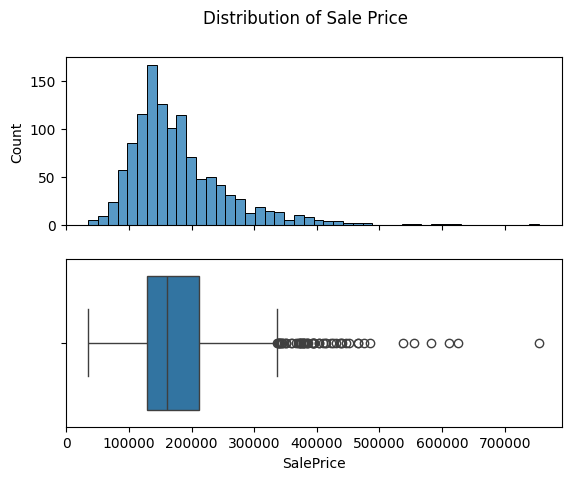

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="SalePrice", ax=ax[0])
sns.boxplot(data=df, x="SalePrice", ax=ax[1])
plt.suptitle("Distribution of Sale Price")
plt.show()

# 1. Analyse de OverallQual

OverallQual : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)

- 50% des biens immobiliers ont une note comprise entre 5/10 et 7/10
- La médiane des notes est de 6/10
- Il y a une forte corrélation entre le prix et le score de qualité global

In [8]:
df["OverallQual"].describe()

count    1180.000000
mean        6.095763
std         1.383956
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable OverallQual dans ce jeu de donnée')

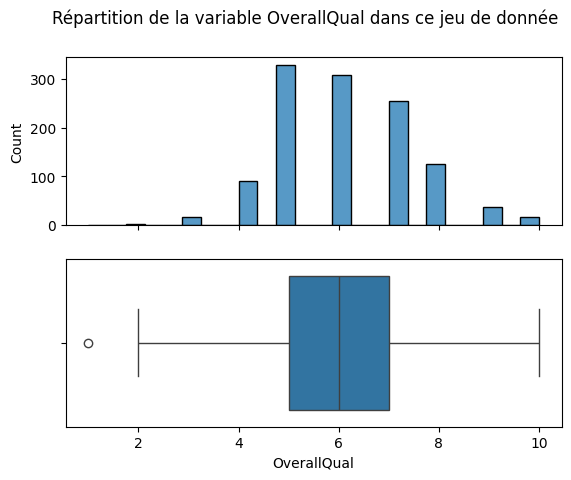

In [9]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df, x="OverallQual", ax=ax[0])
sns.boxplot(data=df, x="OverallQual", ax=ax[1])
plt.suptitle("Répartition de la variable OverallQual dans ce jeu de donnée")

In [10]:
df.groupby("OverallQual")["SalePrice"].describe()

,count,mean,std,min,25%,50%,75%,max
OverallQual,,,,,,,,
1,1.0,39300.000000,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
2,3.0,51770.333333,14254.200796,35311.0,47655.5,60000.0,60000.0,60000.0
3,16.0,88779.687500,25734.275488,37900.0,75500.0,86250.0,98100.0,139600.0
4,90.0,103364.955556,24822.193100,34900.0,85050.0,104050.0,120125.0,161500.0
5,328.0,133137.420732,27247.284634,55993.0,117000.0,132750.0,146625.0,228950.0
6,307.0,160340.456026,36800.195323,76000.0,136700.0,159000.0,181000.0,277000.0
7,255.0,208301.407843,44599.793620,82500.0,179570.0,200141.0,233500.0,375000.0
8,126.0,274905.095238,67327.231812,122000.0,235000.0,267000.0,309750.0,538000.0
9,37.0,364166.000000,76969.669221,239000.0,319900.0,350000.0,385000.0,611657.0


<Axes: xlabel='OverallQual'>

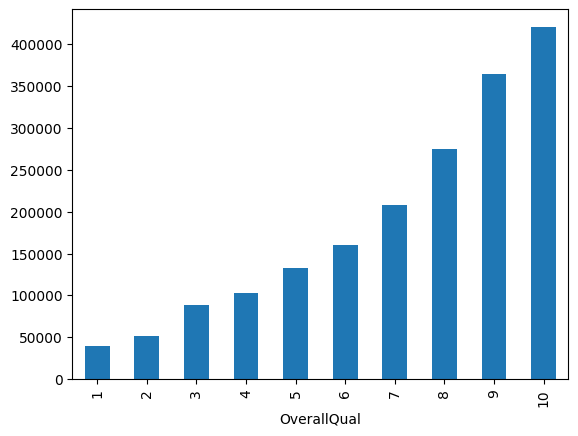

In [11]:
df.groupby("OverallQual")["SalePrice"].mean().sort_index().plot(kind="bar")

# Test de ANOVA

In [12]:
df.groupby("OverallQual")["SalePrice"].mean().round(2)

OverallQual
1      39300.00
2      51770.33
3      88779.69
4     103364.96
5     133137.42
6     160340.46
7     208301.41
8     274905.10
9     364166.00
10    420564.18
Name: SalePrice, dtype: float64

In [13]:
print("Ho : 'La moyenne des prix de vente est la même quel que soit le niveau de qualité.'")

alpha = 0.02
p_value = f_oneway(*df.groupby("OverallQual")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La moyenne des prix de vente est la même quel que soit le niveau de qualité.'
On rejette Ho
p_value = 5.1684140235428114e-288


# 2. Analyse de GarageCars
GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.

- Les biens immobiliers avec 2 places de garage sont 654
- Les biens immobiliers avec 1 places de garage sont 312
- Les biens immobiliers avec 3 places de garage sont 144
- Les biens immobiliers avec 0 places de garage sont 66
- Les biens immobiliers avec 4 places de garage sont 4

- Le prix de vente augmente avec le nombres de places de voiture dans le garage, attention cependant<br>
les données pour 4 places sont trop peu nombreuses pour conclure de manière fiable → biais possible.

In [14]:
df["GarageCars"].value_counts().sort_index()

GarageCars
0     66
1    312
2    654
3    144
4      4
Name: count, dtype: int64

<Axes: xlabel='GarageCars'>

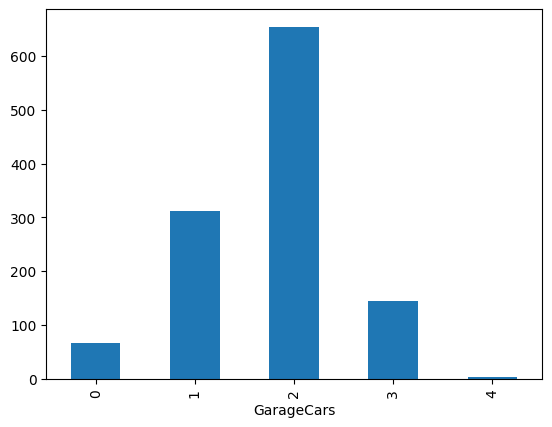

In [15]:
df["GarageCars"].value_counts().sort_index().plot(kind="bar")

In [16]:
df.groupby("GarageCars")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,66.0,102136.36,32201.23,34900.0,82125.0,97500.0,118375.00,200500.0
1,312.0,126211.24,28852.25,35311.0,110000.0,127000.0,140000.00,266500.0
2,654.0,184143.37,52494.03,55993.0,148700.0,178000.0,212000.00,430000.0
3,144.0,311432.00,104137.03,87000.0,245262.5,305450.0,372426.50,755000.0
4,4.0,198819.75,58641.13,123000.0,180750.0,203150.0,221219.75,265979.0


<Axes: xlabel='GarageCars'>

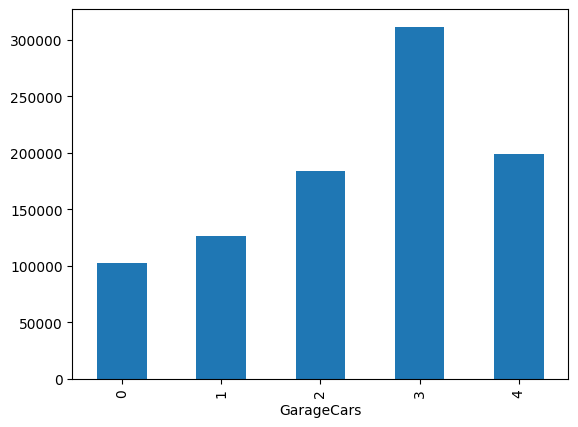

In [17]:
df.groupby("GarageCars")["SalePrice"].mean().sort_index().plot(kind="bar")

# ANOVA

In [18]:
df.groupby("GarageCars")["SalePrice"].mean().round(2)

GarageCars
0    102136.36
1    126211.24
2    184143.37
3    311432.00
4    198819.75
Name: SalePrice, dtype: float64

In [19]:
print("Ho : 'Le nombre de voitures dans le garage n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = f_oneway(*df.groupby("GarageCars")["SalePrice"].apply(list)).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'Le nombre de voitures dans le garage n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 4.297924440725806e-179


# 3. Analyse de FullBath
FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.

- Les biens avec aucune et 3 salle de bains sont sous-représenté dans ce dataset
- Les biens avec 1 salle de bain sont 539
- Les biens avec 2 salles de bain sont 609
- Le nombre de salle de bain à un impact sur le prix de vente,<br>
attention les biens avec 0 sdb ne sont que 7 dont peu représentatif. 

In [20]:
df["FullBath"].value_counts().sort_index()

FullBath
0      7
1    539
2    609
3     25
Name: count, dtype: int64

<Axes: xlabel='FullBath'>

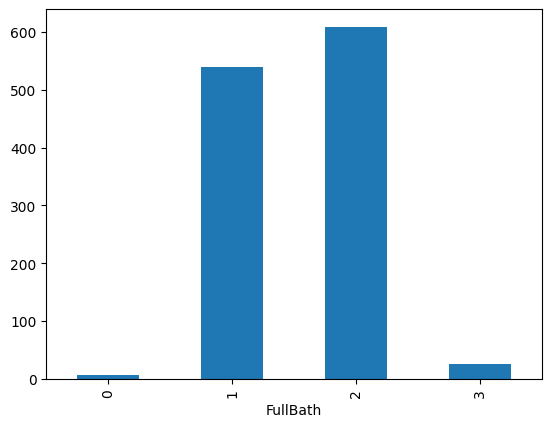

In [21]:
df["FullBath"].value_counts().sort_index().plot(kind="bar")

In [22]:
df.groupby("FullBath")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
FullBath,,,,,,,,
0,7.0,181781.57,113363.12,35311.0,126479.5,145000.0,227100.5,385000.0
1,539.0,133716.12,42758.19,34900.0,110000.0,131500.0,149700.0,423000.0
2,609.0,213717.36,73766.86,64500.0,170000.0,195000.0,248000.0,611657.0
3,25.0,347633.20,154254.68,170000.0,200624.0,325000.0,430000.0,755000.0


<Axes: xlabel='FullBath'>

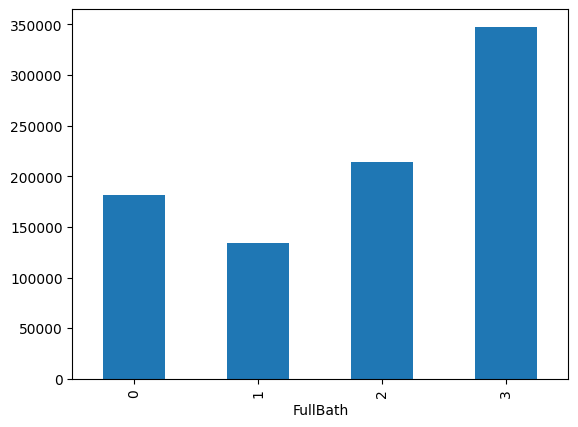

In [23]:
df.groupby("FullBath")["SalePrice"].mean().plot(kind="bar")

# Test de ANOVA

In [24]:
df.groupby("FullBath")["SalePrice"].mean().round(2)

FullBath
0    181781.57
1    133716.12
2    213717.36
3    347633.20
Name: SalePrice, dtype: float64

In [25]:
print("Ho : 'Le nombre de salle de bain n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = f_oneway(*df.groupby("FullBath")["SalePrice"].apply(list)).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'Le nombre de salle de bain n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 8.741640188741584e-106


# 4. Analyse de TotRmsAbvGrd
TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.

- Le nombre total de pièces au-dessus du sol varie de 2 à 14 dans ce jeu de données.
- La moyenne est de 6.5 avec un écart-type de 1.63
- La médiane est de 6 pièces au-dessus du sol
- 50% des biens immobiliers ont entre 5 et 7 pièces au-dessus du sol.
- Le nombre de pièces au-dessus du sol à un impact sur le prix

In [26]:
df["TotRmsAbvGrd"].value_counts().sort_index()

TotRmsAbvGrd
2       1
3      13
4      83
5     223
6     337
7     259
8     145
9      59
10     34
11     14
12     11
14      1
Name: count, dtype: int64

In [27]:
df["TotRmsAbvGrd"].describe()

count    1180.000000
mean        6.486441
std         1.630078
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable TotRmsAbvGrd dans ce jeu de donnée')

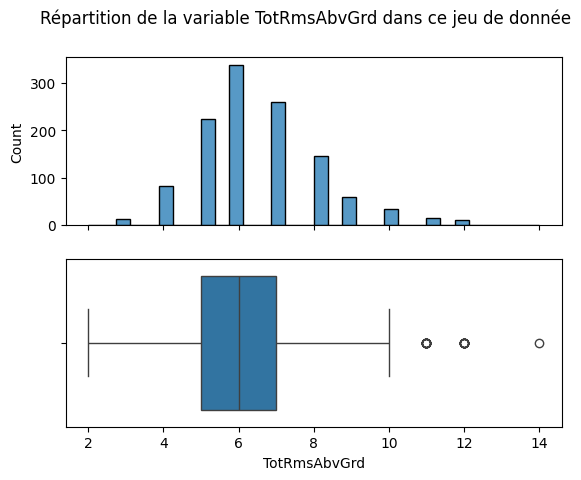

In [28]:
fig, ax = plt.subplots(2 ,1, sharex=True)
sns.histplot(data=df, x="TotRmsAbvGrd", ax=ax[0])
sns.boxplot(data=df, x="TotRmsAbvGrd", ax=ax[1])
plt.suptitle("Répartition de la variable TotRmsAbvGrd dans ce jeu de donnée")

In [29]:
df.groupby("TotRmsAbvGrd")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
2,1.0,39300.00,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
3,13.0,100138.46,29751.04,60000.0,80500.0,86000.0,131500.0,149300.0
4,83.0,121846.34,42224.68,34900.0,91150.0,120000.0,139500.0,260000.0
5,223.0,138754.96,47106.37,55000.0,110000.0,129900.0,155500.0,385000.0
6,337.0,161323.66,49489.37,37900.0,130500.0,155000.0,185850.0,374000.0
7,259.0,197826.87,67009.34,79900.0,155000.0,182900.0,231750.0,465000.0
8,145.0,213529.72,77251.88,81000.0,154000.0,200000.0,253293.0,466500.0
9,59.0,254544.93,80652.44,98000.0,201762.0,250000.0,311906.5,426000.0
10,34.0,306033.29,149384.73,118500.0,169975.0,300000.0,373650.0,755000.0


<Axes: xlabel='TotRmsAbvGrd'>

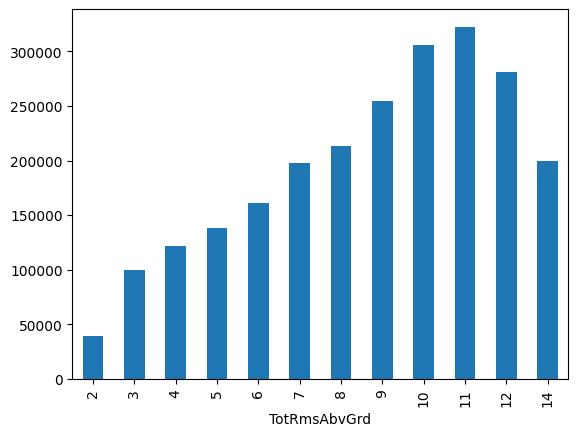

In [30]:
df.groupby("TotRmsAbvGrd")["SalePrice"].mean().plot(kind="bar")

# ANOVA

In [31]:
df.groupby("TotRmsAbvGrd")["SalePrice"].mean().round(2)

TotRmsAbvGrd
2      39300.00
3     100138.46
4     121846.34
5     138754.96
6     161323.66
7     197826.87
8     213529.72
9     254544.93
10    306033.29
11    322460.36
12    280971.45
14    200000.00
Name: SalePrice, dtype: float64

In [32]:
print("Ho : 'Le nombre de pièces au-dessus du sol n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = f_oneway(*df.groupby("TotRmsAbvGrd")["SalePrice"].apply(list)).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'Le nombre de pièces au-dessus du sol n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.0562196727955126e-89


# 5. Analyse de KitchenQual
KitchenQual : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.

- Il y a 34 cuisines de qualité Fa
- Il y a 600 cuisines de qualité TA
- Il y a 462 cuisines de qualité Gd
- Il y a 84 cuisines de qualité Ex
- Les qualité Fa et Ex sont peu présente dans ce dataset
- La qualité de la cuisine a un impact sur le prix de ventes



Ex = Excellent

Fa = Fair

Gd = Good

TA = Typical/Average

In [33]:
qual_order = ["Fa", "TA", "Gd", "Ex"]

In [34]:
df["KitchenQual"].value_counts().loc[qual_order]


KitchenQual
Fa     34
TA    600
Gd    462
Ex     84
Name: count, dtype: int64

<Axes: xlabel='KitchenQual'>

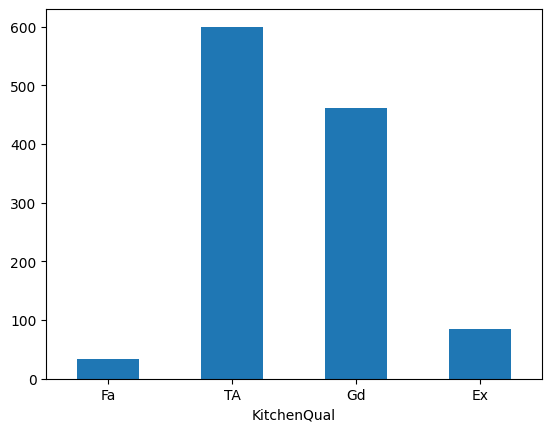

In [35]:
df["KitchenQual"].value_counts().loc[qual_order].plot(kind="bar", rot=0)

In [36]:
df.groupby("KitchenQual")["SalePrice"].describe().round(2).loc[qual_order]

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Fa,34.0,105477.74,35368.84,39300.0,82000.00,111750.0,129500.0,200000.0
TA,600.0,139459.92,39949.66,34900.0,115000.00,136500.0,160000.0,375000.0
Gd,462.0,211736.79,65586.48,79000.0,171787.50,200000.0,242000.0,625000.0
Ex,84.0,322685.36,118171.58,86000.0,252719.75,316530.5,388295.5,755000.0


<Axes: xlabel='KitchenQual'>

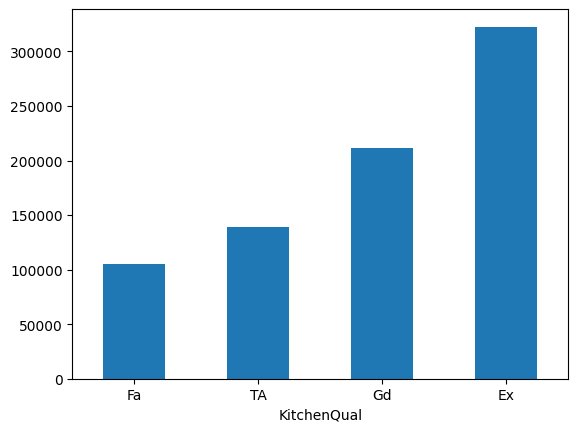

In [37]:
df.groupby("KitchenQual")["SalePrice"].mean().loc[qual_order].plot(kind="bar", rot=0)

# ANOVA

In [38]:
df.groupby("KitchenQual")["SalePrice"].mean().loc[qual_order].round(2)

KitchenQual
Fa    105477.74
TA    139459.92
Gd    211736.79
Ex    322685.36
Name: SalePrice, dtype: float64

In [39]:
print("Ho : 'La qualité de la cuisine n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*df.groupby("KitchenQual")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")

print(f"p_value = {p_value}")

Ho : 'La qualité de la cuisine n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 6.810843735454451e-151


# 6. Analyse de Fireplaces
Fireplaces : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.

- Les biens immobiliers n'ayant aucune cheminée sont au nombre de 566
- Les biens immobiliers ayant 1 cheminée sont au nombre de 513
- Les biens immobiliers ayant 2 cheminée sont au nombre de 97
- Les biens immobiliers ayant 3 cheminée sont au nombre de 4
- Les biens immobiliers avec 2 et 3 cheminées sont peu représenté dans ce dataset
- Le nombre de cheminée a un impact sur le prix de vente


In [40]:
df["Fireplaces"].value_counts().sort_index()

Fireplaces
0    566
1    513
2     97
3      4
Name: count, dtype: int64

<Axes: xlabel='Fireplaces'>

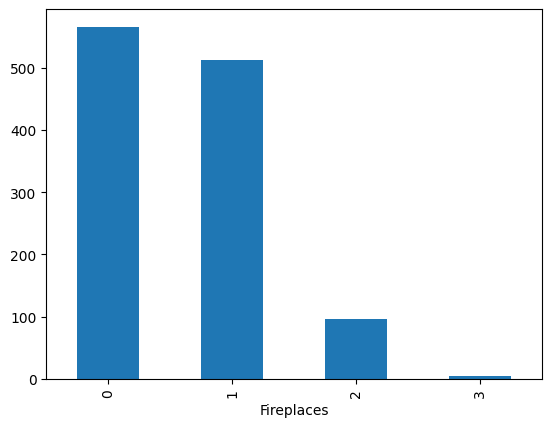

In [41]:
df["Fireplaces"].value_counts().sort_index().plot(kind="bar")

In [42]:
df.groupby("Fireplaces")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Fireplaces,,,,,,,,
0,566.0,140227.73,44629.25,34900.0,110000.0,135000.0,163875.0,342643.0
1,513.0,211149.16,80200.58,60000.0,156932.0,189000.0,253000.0,625000.0
2,97.0,241719.02,114039.96,110000.0,160000.0,206900.0,299800.0,755000.0
3,4.0,263750.00,103390.44,160000.0,182500.0,267500.0,348750.0,360000.0


<Axes: xlabel='Fireplaces'>

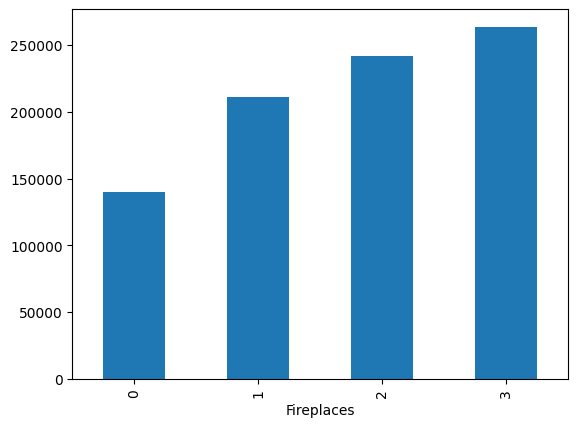

In [43]:
df.groupby("Fireplaces")["SalePrice"].mean().plot(kind="bar")

# ANOVA

In [44]:
df.groupby("Fireplaces")["SalePrice"].mean().round(2)

Fireplaces
0    140227.73
1    211149.16
2    241719.02
3    263750.00
Name: SalePrice, dtype: float64

In [45]:
print("Ho : 'Le nombre de cheminées n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*df.groupby("Fireplaces")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'Le nombre de cheminées n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 2.2812054320339362e-69


# 7. Analyse de Neighborhood
Neighborhood : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.

- Il y a 25 emplacements différents dans ce dataset
- Il y a aussi des désiquilibres
- L'emplacement joue un role dans la valeurs d'un bien immobilier
- On pourra envisager un encoder Ordinal, et peut être même regrouper des quartiers ensemble

In [46]:
df["Neighborhood"].value_counts().sort_index()

Neighborhood
Blmngtn     16
Blueste      2
BrDale      15
BrkSide     50
ClearCr     23
CollgCr    120
Crawfor     43
Edwards     76
Gilbert     59
IDOTRR      24
MeadowV     13
Mitchel     36
NAmes      198
NPkVill      5
NWAmes      57
NoRidge     33
NridgHt     61
OldTown     91
SWISU       21
Sawyer      62
SawyerW     51
Somerst     67
StoneBr     18
Timber      29
Veenker     10
Name: count, dtype: int64

<Axes: xlabel='Neighborhood'>

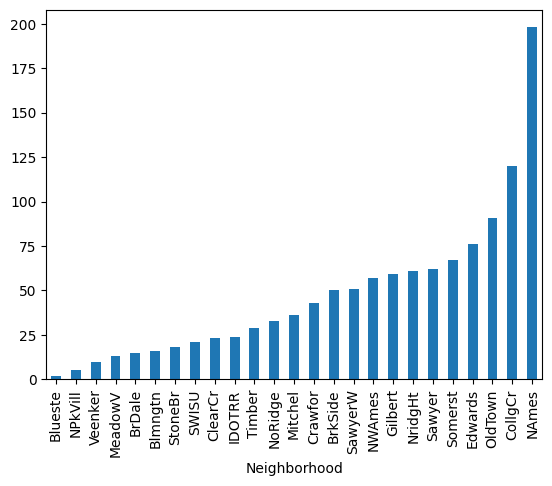

In [47]:
df["Neighborhood"].value_counts().sort_values().plot(kind="bar", rot=90)

In [48]:
df.groupby("Neighborhood")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,16.0,193612.81,30929.46,159895.0,173625.0,186000.0,199023.25,264561.0
Blueste,2.0,137500.00,19091.88,124000.0,130750.0,137500.0,144250.00,151000.0
BrDale,15.0,103593.33,14357.00,83000.0,90500.0,106000.0,115500.00,125000.0
BrkSide,50.0,123869.50,40422.83,39300.0,100500.0,121300.0,136850.00,223500.0
ClearCr,23.0,208731.83,49783.57,130000.0,186250.0,200000.0,240750.00,328000.0
CollgCr,120.0,197651.45,46038.80,110000.0,160312.5,198400.0,226250.00,313000.0
Crawfor,43.0,205599.09,66309.27,90350.0,159250.0,191000.0,232000.00,381000.0
Edwards,76.0,122186.45,37726.04,58500.0,99425.0,118000.0,138025.00,274970.0
Gilbert,59.0,192470.02,37282.63,145000.0,173500.0,181000.0,193750.00,377500.0


<Axes: xlabel='Neighborhood'>

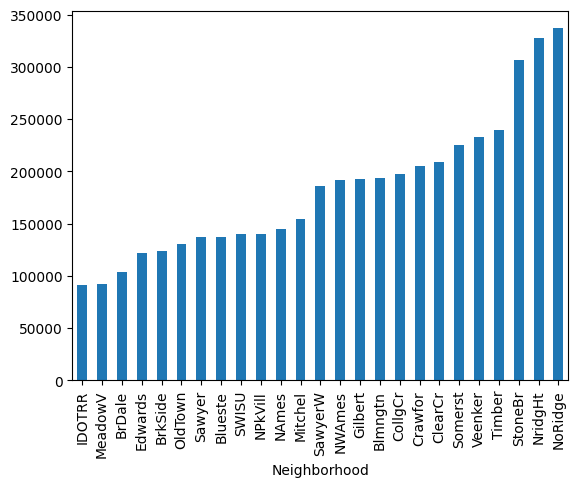

In [49]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="bar")

# ANOVA

In [50]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().round(2)

Neighborhood
IDOTRR      90840.83
MeadowV     91838.46
BrDale     103593.33
Edwards    122186.45
BrkSide    123869.50
OldTown    130304.49
Sawyer     137407.94
Blueste    137500.00
SWISU      139732.57
NPkVill    140550.00
NAmes      145007.54
Mitchel    154076.00
SawyerW    186423.47
NWAmes     192012.37
Gilbert    192470.02
Blmngtn    193612.81
CollgCr    197651.45
Crawfor    205599.09
ClearCr    208731.83
Somerst    224830.03
Veenker    233250.00
Timber     239718.62
StoneBr    307035.44
NridgHt    327473.25
NoRidge    336942.67
Name: SalePrice, dtype: float64

In [51]:
print("Ho : 'Le quartier n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*df.groupby("Neighborhood")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'Le quartier n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 2.6683172951041164e-190


# 8. Analyse de ExterQual
ExterQual : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.

Ex = Excellent

Fa = Fair

Gd = Good

TA = Typical/Average

- FA : 11 biens immobiliers
- TA : 742 biens immobiliers
- Gd : 383 biens immobiliers
- Ex : 44 biens immobiliers
- On constate un désiquilibre avec FA/Ex vs TA/Gd
- La qualité des matériaux extérieur à un impact sur le prix

In [52]:
qualExter_order = ["Fa", "TA", "Gd", "Ex"]

In [53]:
df["ExterQual"].value_counts().loc[qualExter_order]

ExterQual
Fa     11
TA    742
Gd    383
Ex     44
Name: count, dtype: int64

<Axes: xlabel='ExterQual'>

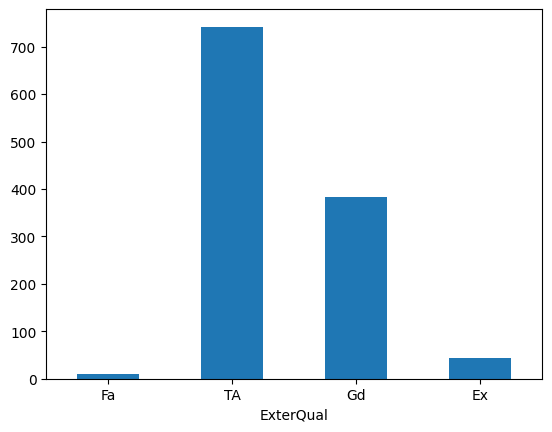

In [54]:
df["ExterQual"].value_counts().loc[qualExter_order].plot(kind="bar", rot=0)

In [55]:
df.groupby("ExterQual")["SalePrice"].describe().round(2).loc[qualExter_order]

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
Fa,11.0,94072.09,42834.35,39300.0,71000.0,85000.0,107500.0,200000.0
TA,742.0,143120.80,43400.79,34900.0,117000.0,138843.5,165000.0,381000.0
Gd,383.0,231246.00,66978.53,107400.0,185675.0,219500.0,264780.5,625000.0
Ex,44.0,372557.14,121455.31,160000.0,311404.0,374189.0,437560.5,755000.0


<Axes: xlabel='ExterQual'>

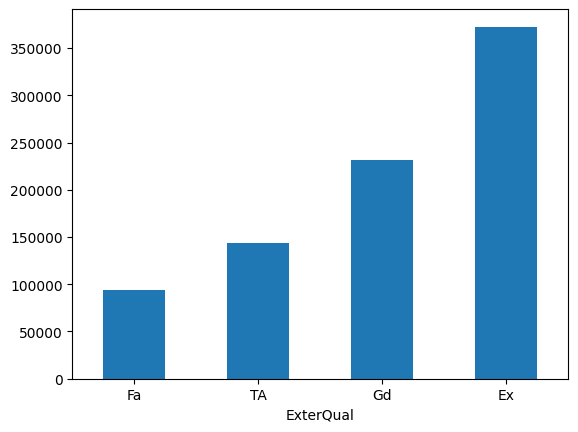

In [56]:
df.groupby("ExterQual")["SalePrice"].mean().round(2).loc[qualExter_order].plot(kind="bar", rot=0)

# ANOVA

In [57]:
df.groupby("ExterQual")["SalePrice"].mean().round(2)

ExterQual
Ex    372557.14
Fa     94072.09
Gd    231246.00
TA    143120.80
Name: SalePrice, dtype: float64

In [58]:
print("Ho : 'La qualité des matériaux extérieur n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*df.groupby("ExterQual")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La qualité des matériaux extérieur n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 2.847642171680832e-175


# 9. Analyse de GrLivArea
GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.

- Certains quartiers sont sous représenté dans ce dataset, il faudra surement en regrouper quelques un ensemble
- Les maisons entre 1118 et 1779 m² représente 50% du dataset
- Avec une moyenne de 1508 m² avec un écart type de 534.63m²
- La médiane est de 1441.5m²
- On observe une tendance linéaire entre le prix et la surface
- La surface habitable est corrélé au prix de vente

In [59]:
df["GrLivArea"].describe().round(2)

count    1180.00
mean     1508.28
std       534.63
min       334.00
25%      1118.00
50%      1441.50
75%      1779.00
max      5642.00
Name: GrLivArea, dtype: float64

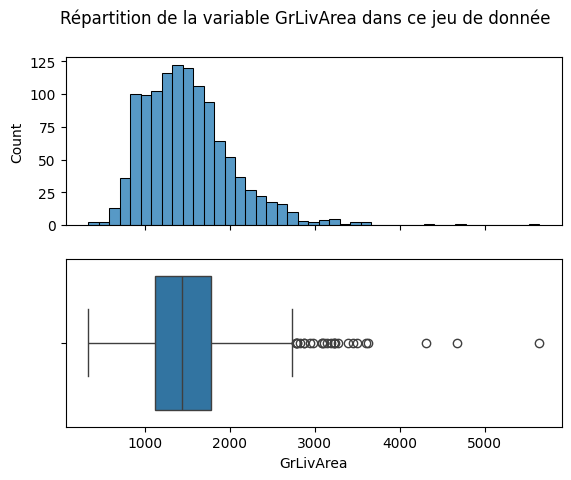

In [60]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="GrLivArea", ax=ax[0])
sns.boxplot(data=df, x="GrLivArea", ax=ax[1])
plt.suptitle("Répartition de la variable GrLivArea dans ce jeu de donnée")
plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

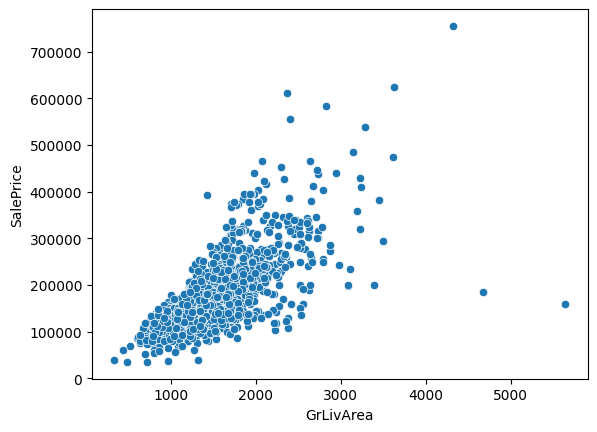

In [61]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

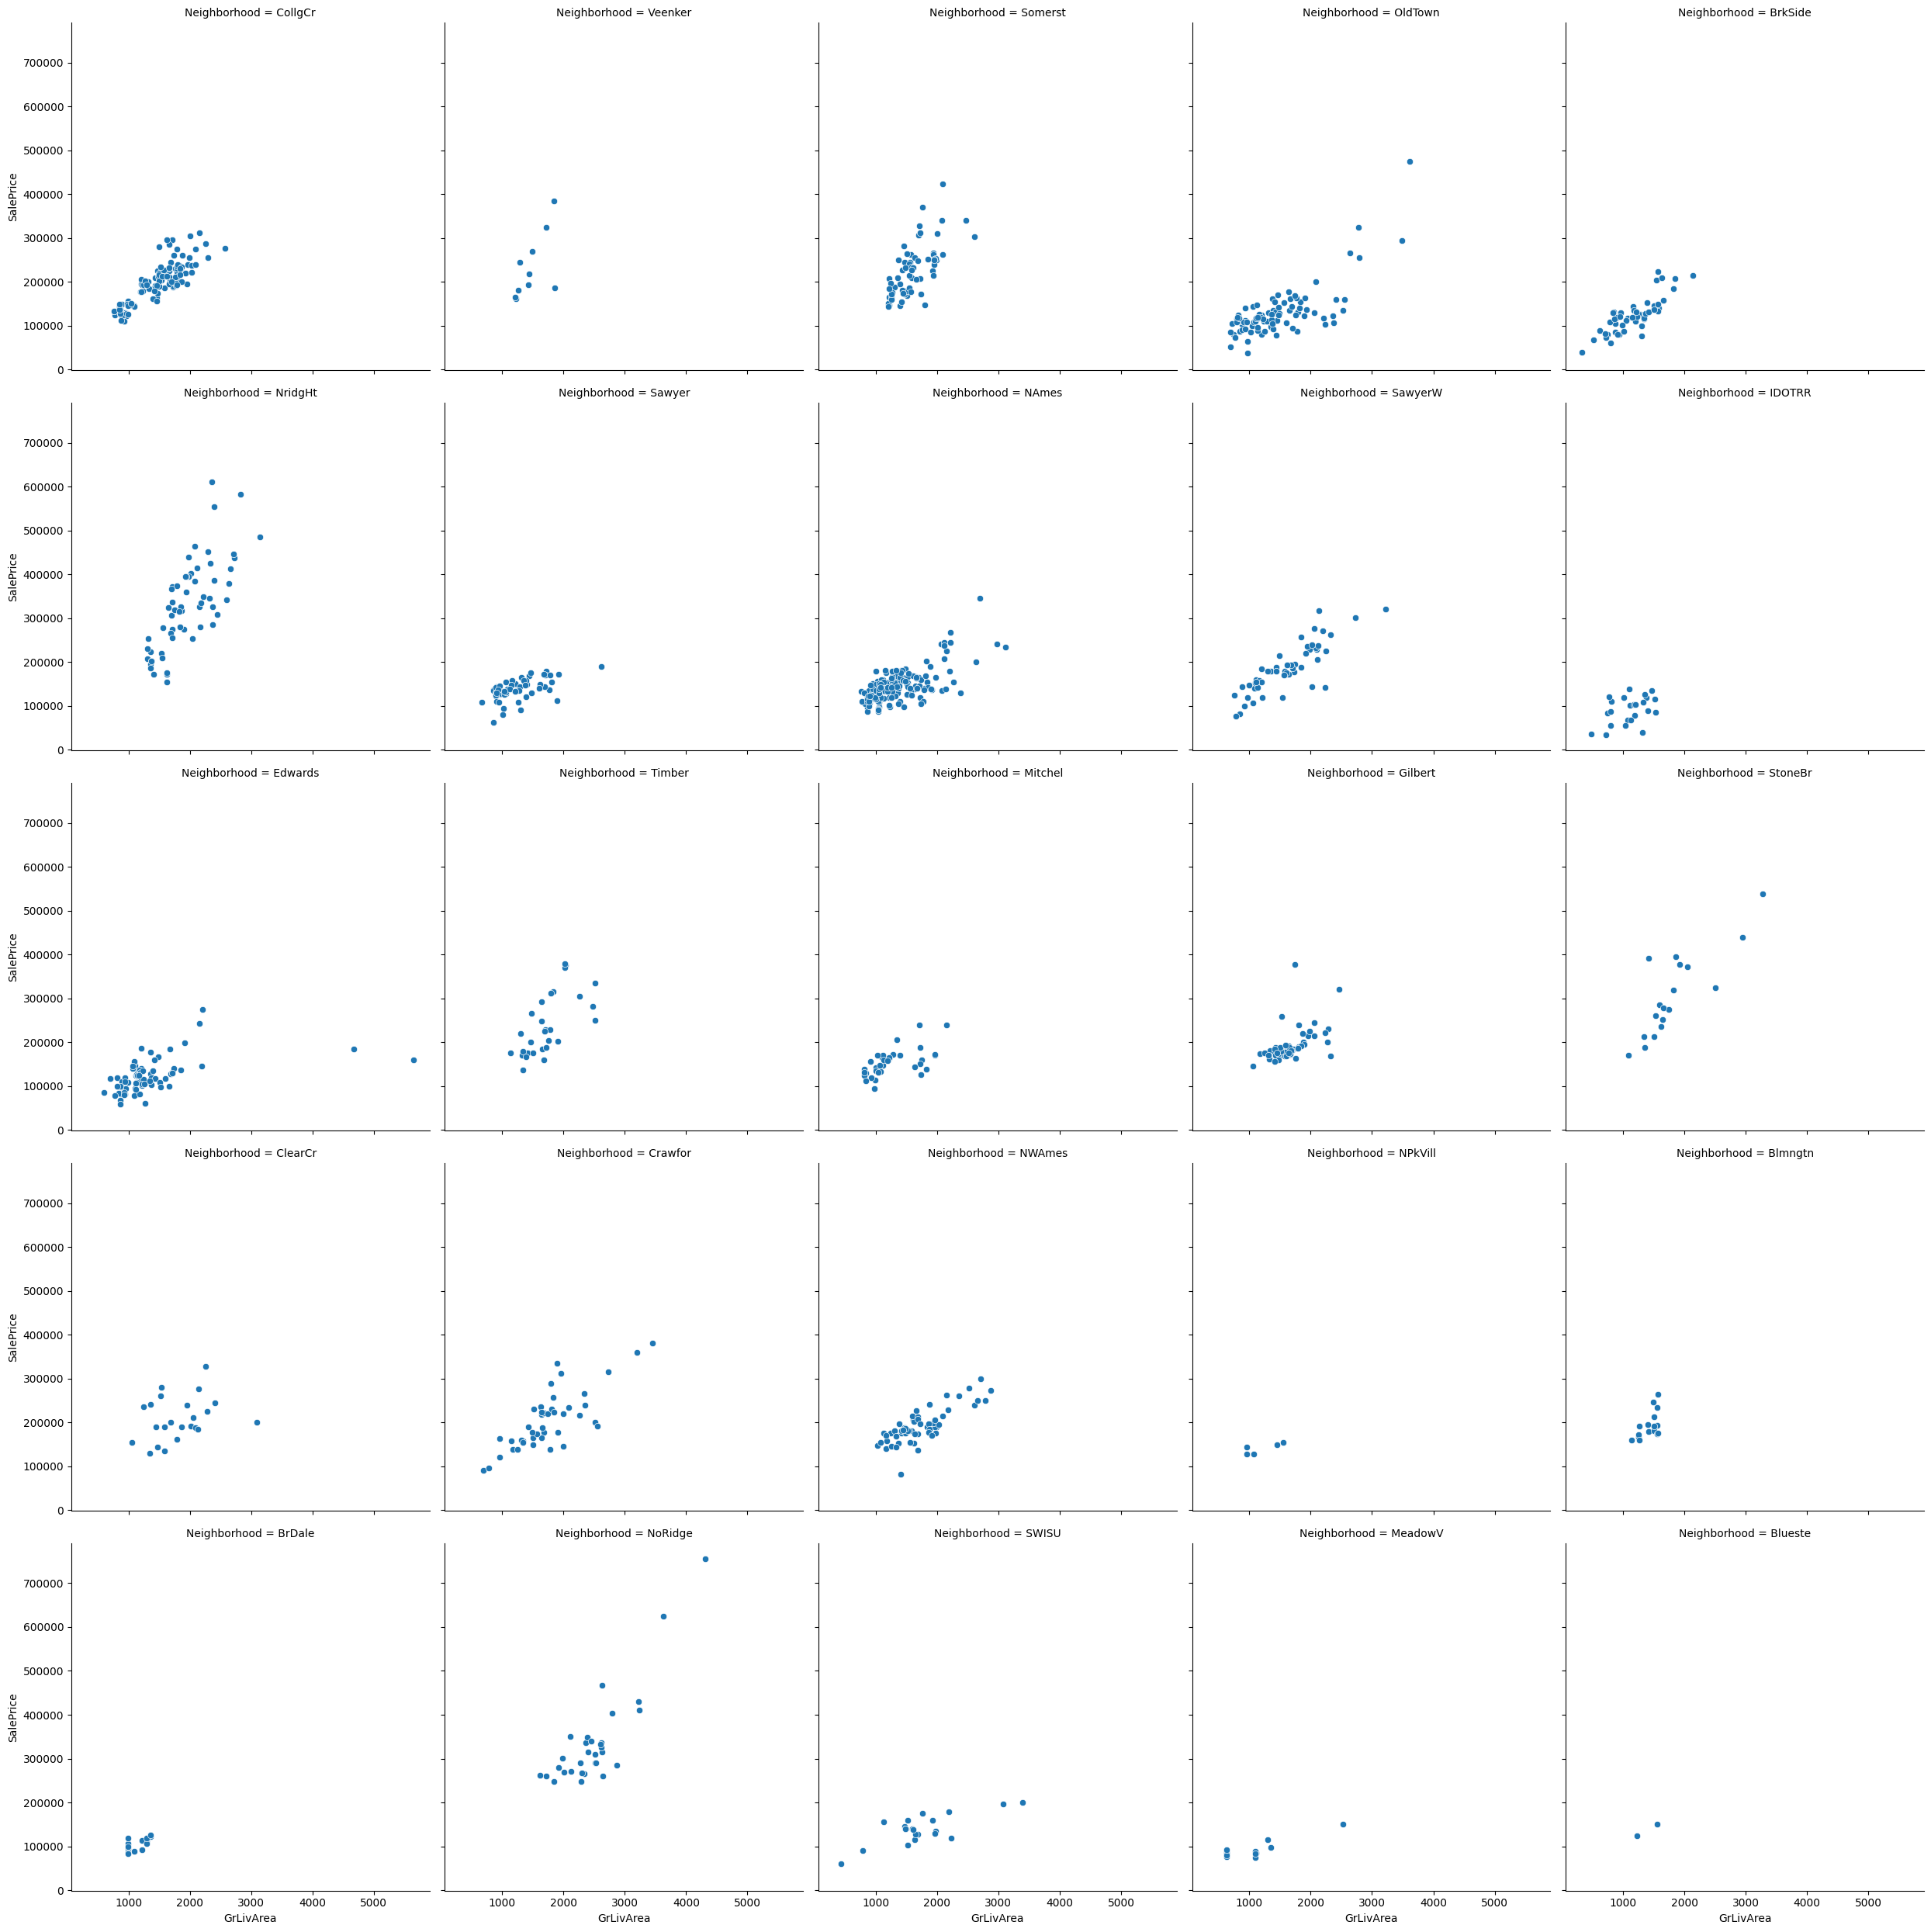

In [62]:
sns.relplot(data=df, x="GrLivArea", y="SalePrice", col="Neighborhood", col_wrap=5)

# PearsonR

In [72]:
print("Ho : 'La surface habitable n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(df["GrLivArea"], df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La surface habitable n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.479176876453808e-178


# 10. Analyse de TotalBsmtSF
TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.

- 50% des propriété ont un sous sol d'une superficie comprisent entre 793 et 1309 m²
- Une propriété un sous sol de 6110 m², très éloigné de toutes les autres
- La moyenne est de 1058.87m² avec un écart type de 448m²
- La médiane est de 993.50m²
- La surface du sous-sol à un impact sur le prix d'une propriété

In [65]:
df["TotalBsmtSF"].describe().round(2)

count    1180.00
mean     1058.87
std       448.65
min         0.00
25%       793.00
50%       993.50
75%      1309.50
max      6110.00
Name: TotalBsmtSF, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable TotalBsmtSF dans ce jeu de donnée')

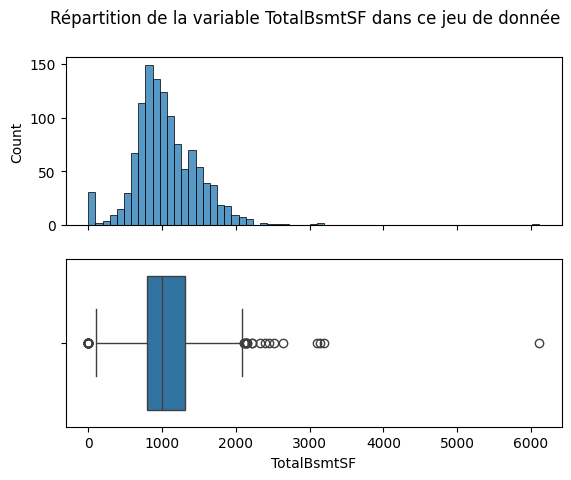

In [66]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="TotalBsmtSF", ax=ax[0])
sns.boxplot(data=df, x="TotalBsmtSF", ax=ax[1])
plt.suptitle("Répartition de la variable TotalBsmtSF dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

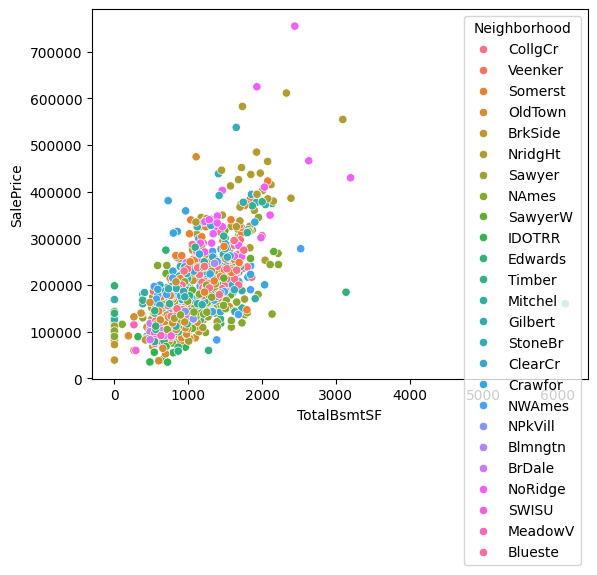

In [69]:
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", hue="Neighborhood")

In [71]:
print("Ho : 'La surface totale du sous-sol n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(df["TotalBsmtSF"], df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La surface totale du sous-sol n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 3.778003148327125e-123


# 11. Analyse de 1stFlrSF
1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.

- 50% des maisons ont une superficie du rez-de-chaussée entre 879.75 et 1392 m²
- La médiane est de 1088m²
- La moyenne est de 1163.18m² avec un écart type de 395.10m²
- Il y a une maison isolé du reste du dataset avec une superficie de rdc de 4692 m²
- La surface du RDC est corrélé au prix des maisons


In [73]:
df["1stFlrSF"].describe().round(2)

count    1180.00
mean     1163.18
std       395.10
min       334.00
25%       879.75
50%      1088.00
75%      1392.00
max      4692.00
Name: 1stFlrSF, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable 1stFlrSF dans ce jeu de donnée')

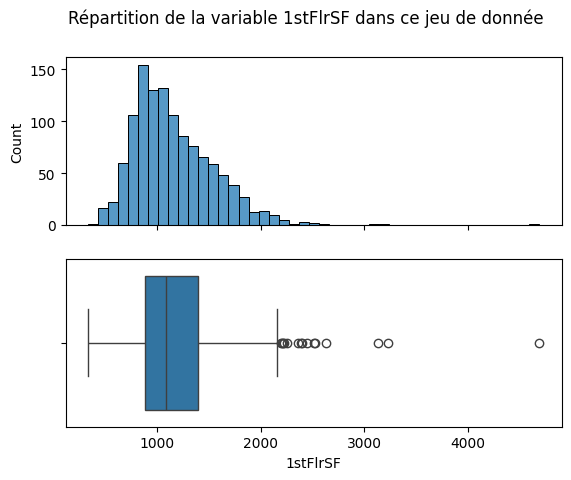

In [74]:
fig , ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="1stFlrSF", ax=ax[0])
sns.boxplot(data=df, x="1stFlrSF", ax=ax[1])
plt.suptitle("Répartition de la variable 1stFlrSF dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

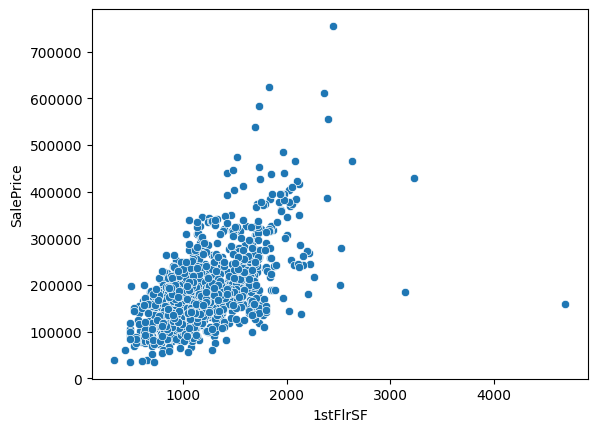

In [76]:
sns.scatterplot(data=df, x="1stFlrSF", y="SalePrice")

In [77]:
print("Ho : 'La surface du RDC n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(df["1stFlrSF"], df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La surface du RDC n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 2.205085994034628e-122


# 12. Analyse de YearBuilt
YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.

- 50% des maisons ont été construite entre 1953 et 2000
- La médiane est 1972
- La moyenne est 1970 avec un écart type de 30 ans
- La plus vielle date de 1872
- La plus récente date de 2010
- Le 1er quartile est très large comparé au 3eme
- l'année de construction est corrélé avec le prix de vente

In [78]:
df["YearBuilt"].describe().round(2)

count    1180.00
mean     1970.69
std        30.00
min      1872.00
25%      1953.00
50%      1972.00
75%      2000.00
max      2010.00
Name: YearBuilt, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable YearBuilt dans ce jeu de donnée')

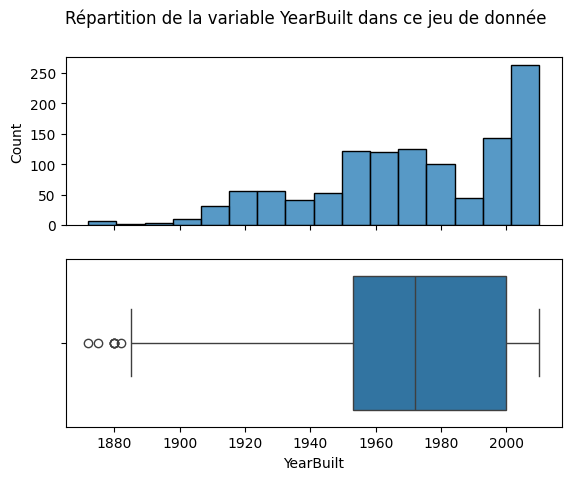

In [79]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="YearBuilt", ax=ax[0])
sns.boxplot(data=df, x="YearBuilt", ax=ax[1])
plt.suptitle("Répartition de la variable YearBuilt dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

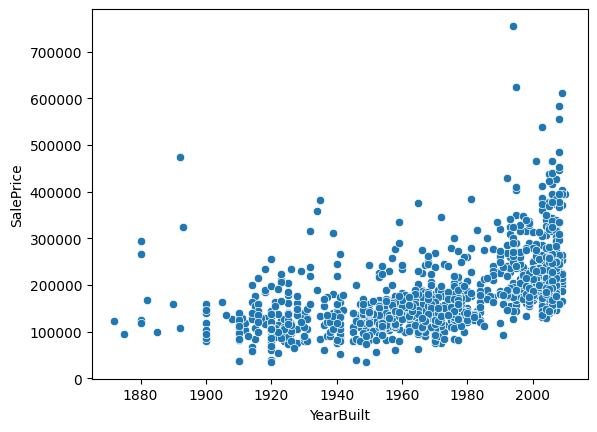

In [80]:
sns.scatterplot(data=df, x="YearBuilt", y="SalePrice")

In [81]:
print("Ho : 'L'année de construction n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(df["YearBuilt"], df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'L'année de construction n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.294401939968056e-84


# 13. Analyse de YearRemodAdd
YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.

- 50% des maisons rénové l'ont été entre 1966 et 2004
- La moyenne est de 1984.51 avec un écart type de 20.78 ans
- La médiane est de 1993
- Presque 150 maisons ont été rénové en 1950
- Il y a des différences de fréquences de rénovation entre certains quartiers de la ville 
- L'année de rénovation a un impact sur le prix de ventes

In [82]:
df["YearRemodAdd"].describe().round(2)

count    1180.00
mean     1984.51
std        20.78
min      1950.00
25%      1966.00
50%      1993.00
75%      2004.00
max      2010.00
Name: YearRemodAdd, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable YearRemodAdd dans ce jeu de donnée')

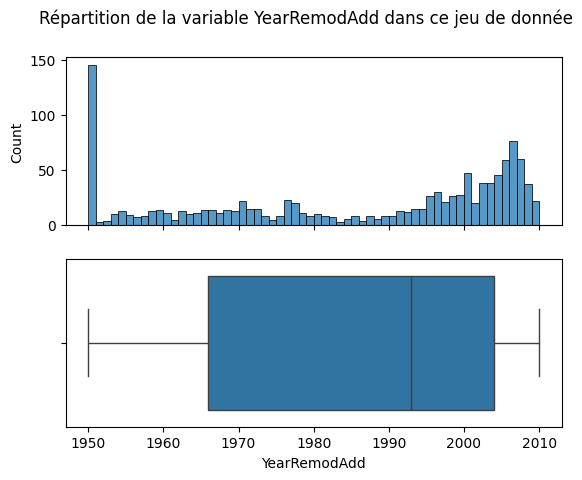

In [89]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="YearRemodAdd", ax=ax[0], bins=60)
sns.boxplot(data=df, x="YearRemodAdd", ax=ax[1])
plt.suptitle("Répartition de la variable YearRemodAdd dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

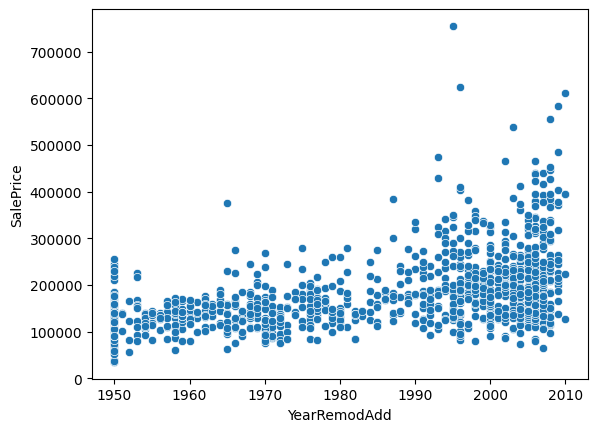

In [92]:
sns.scatterplot(data=df, x="YearRemodAdd", y="SalePrice")

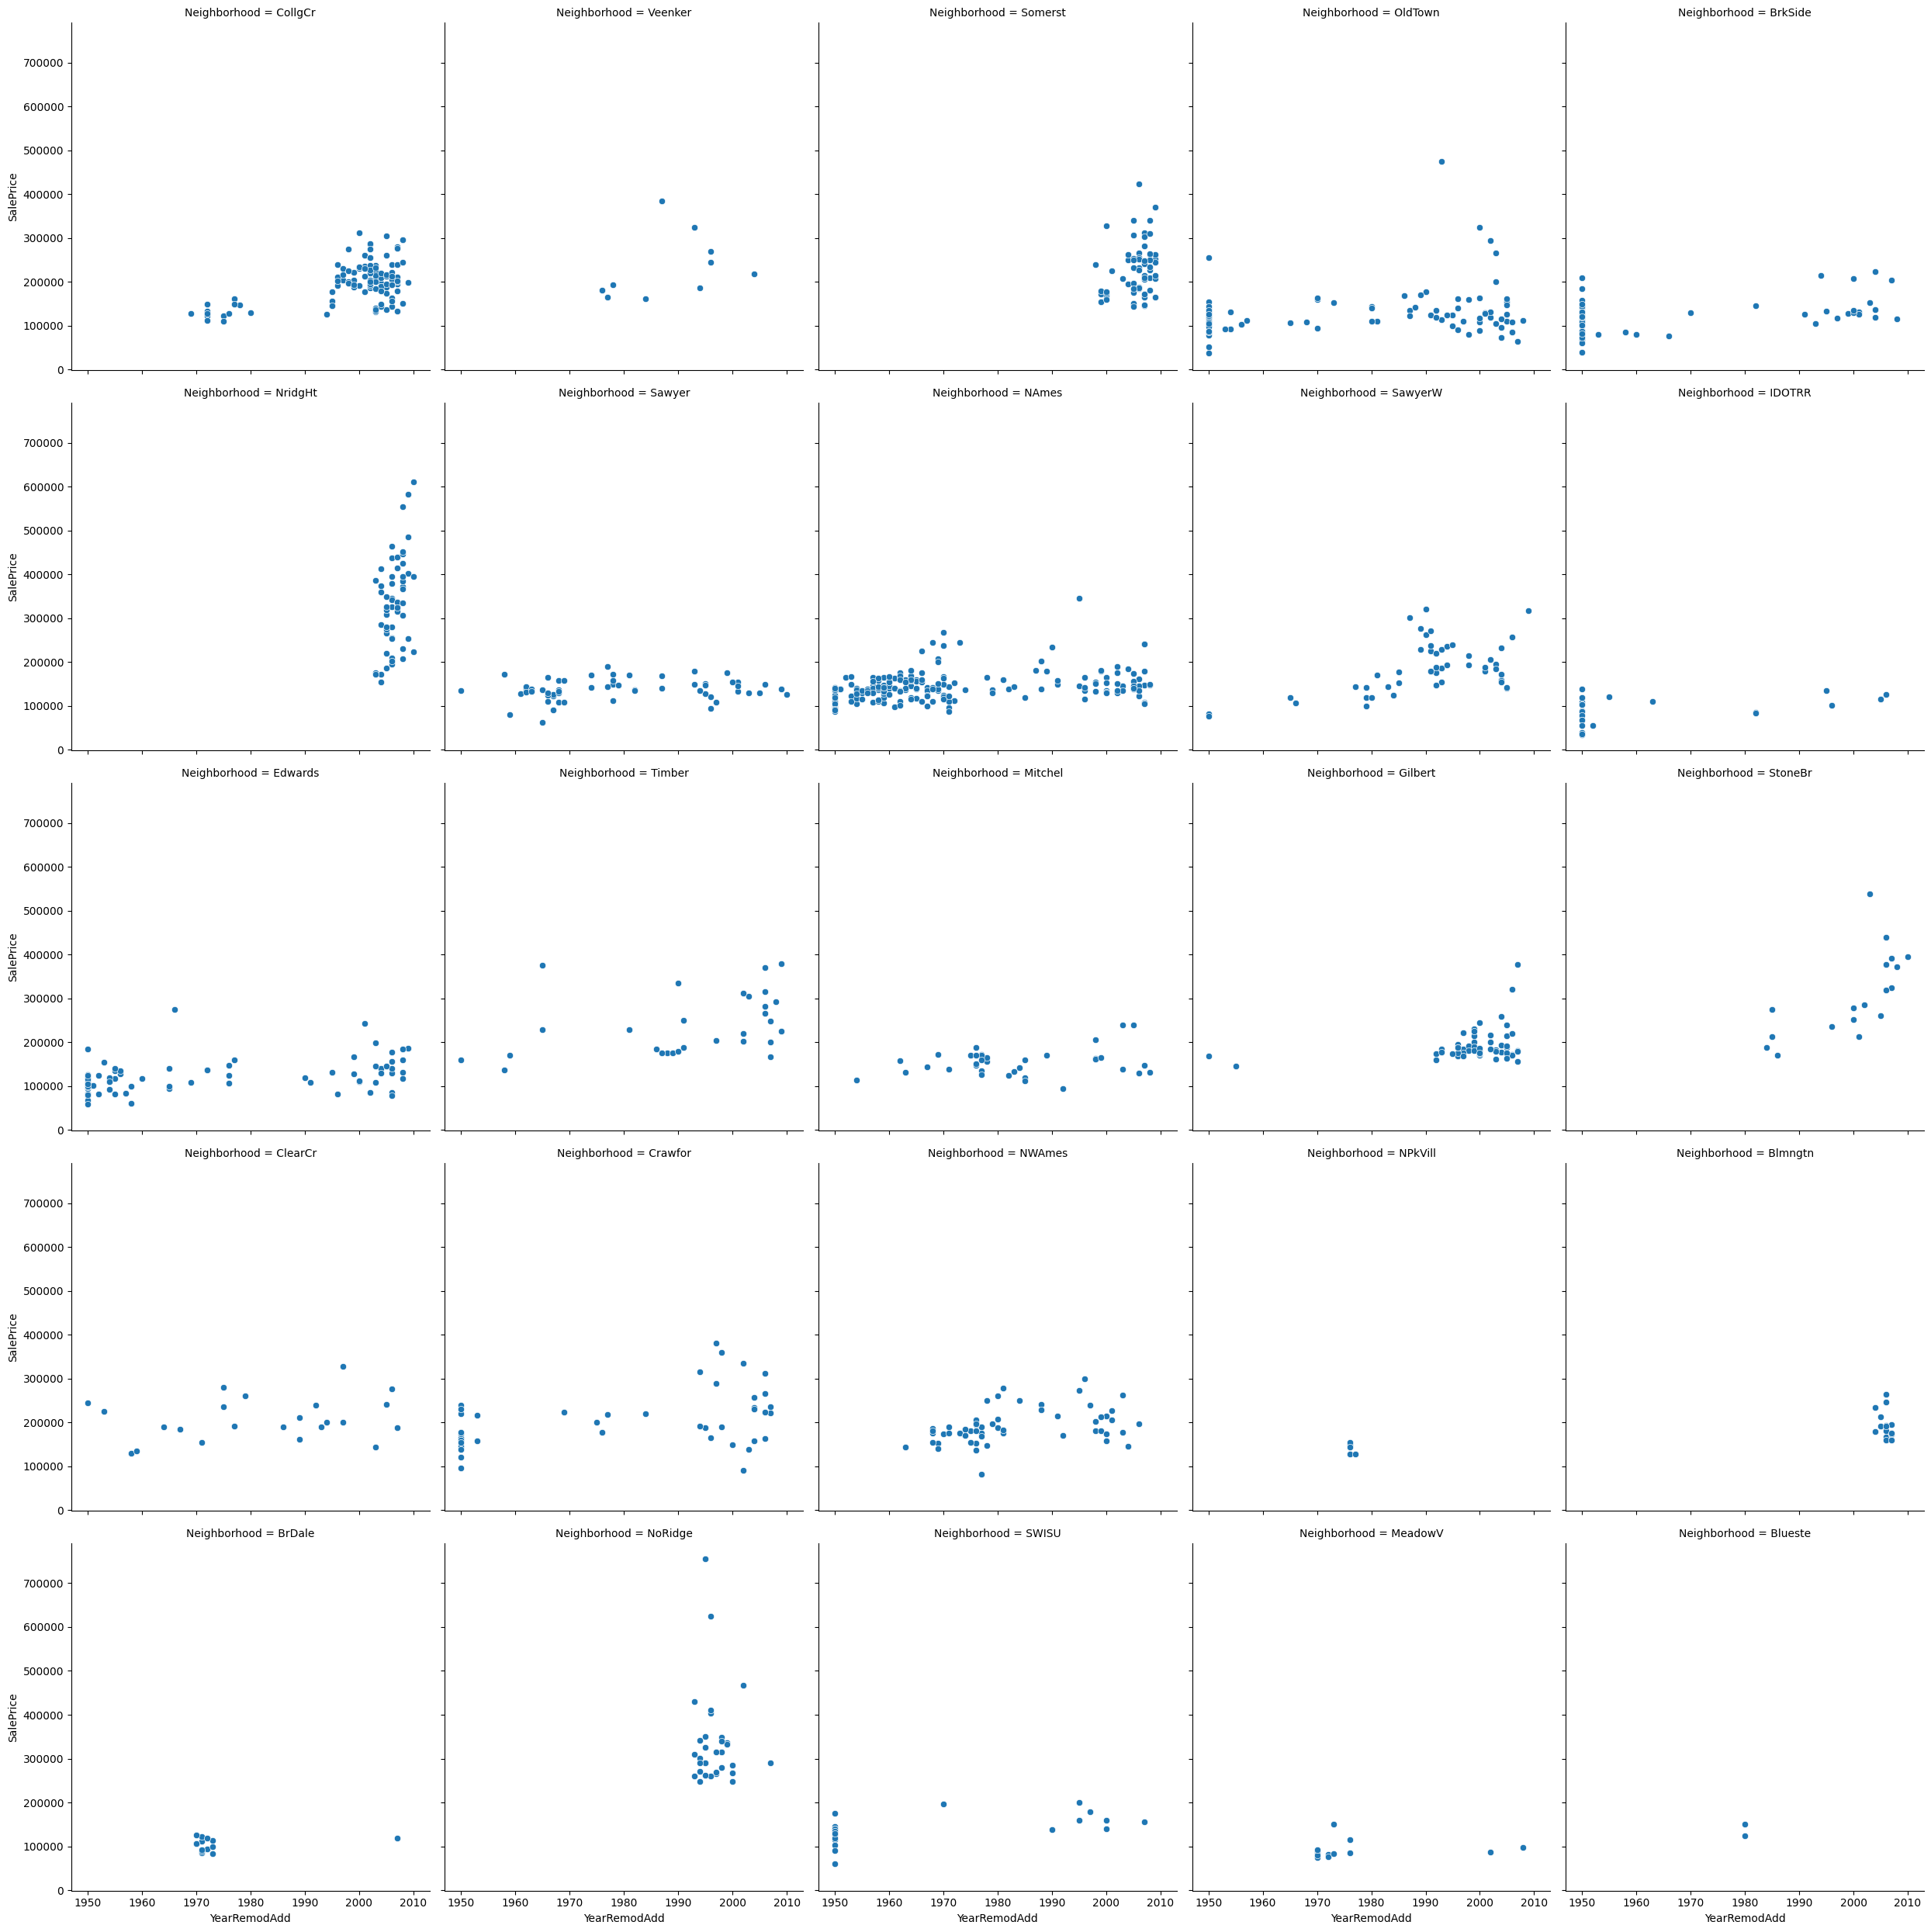

In [93]:
relplot = sns.relplot(data=df, x="YearRemodAdd", y="SalePrice", col="Neighborhood", col_wrap=5)

In [94]:
print("Ho : 'L'année de la dernière rénovation n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = pearsonr(df["YearRemodAdd"], df["SalePrice"]).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'L'année de la dernière rénovation n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.0904745187848917e-78


# 14. Analyse de GarageArea
GarageArea : Taille du garage en pieds carrés.

- 50% des de la surface de garage des maisons de ce dataset est comprise entre 312 et 576 m²
- Il y a au moins une maison sans garage
- La moyenne est de 468.94m² avec un écart type de 211.90m²
- La médiane est de 474m²
- La taille du garage des maisons a une influence sur le prix

In [95]:
df["GarageArea"].describe().round(2)

count    1180.00
mean      468.94
std       211.90
min         0.00
25%       312.00
50%       474.00
75%       576.00
max      1418.00
Name: GarageArea, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable YearRemodAdd dans ce jeu de donnée')

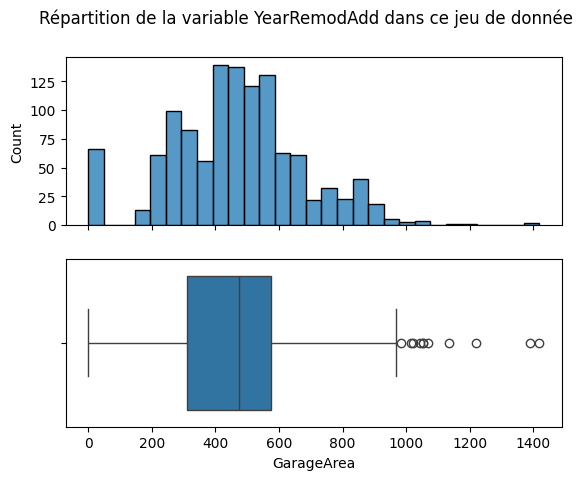

In [100]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x="GarageArea", ax=ax[0])
sns.boxplot(data=df, x="GarageArea", ax=ax[1])
plt.suptitle("Répartition de la variable YearRemodAdd dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

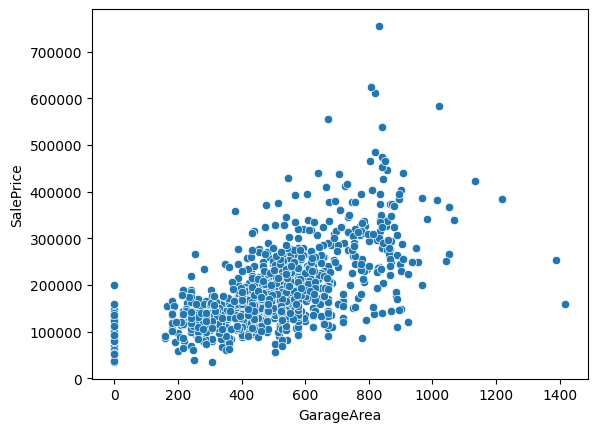

In [101]:
sns.scatterplot(data=df, x="GarageArea", y="SalePrice")

In [102]:
print("Ho : 'La superficie de garage n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = pearsonr(df["GarageArea"], df["SalePrice"]).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'La superficie de garage n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 7.253869868317046e-137


# 15. Analyse de LotArea
LotArea : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.

In [103]:
df["LotArea"].describe().round(2)

count      1180.00
mean      10448.99
std       10266.49
min        1300.00
25%        7500.00
50%        9458.50
75%       11532.75
max      215245.00
Name: LotArea, dtype: float64